In [ ]:
# https://github.com/docaotien/Lab-MKTG5883.N22.CTTT

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

<function matplotlib.pyplot.show(close=None, block=None)>

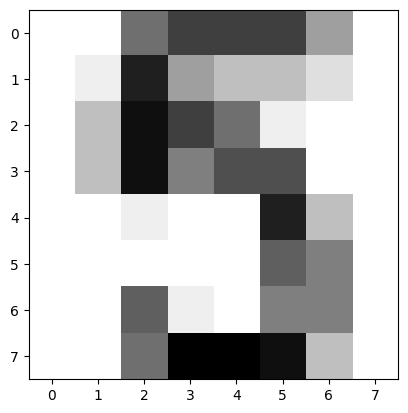

In [3]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r,interpolation='nearest')
plt.show

In [7]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target

X_train, X_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state=42,stratify=y)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


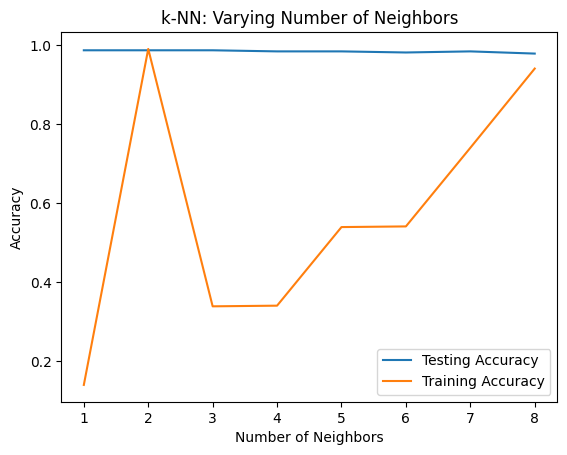

In [9]:
neighbors = np.arange(1,9)
train_accuracy= np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[1] = knn.score(X_train, y_train)
  test_accuracy[i]= knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [12]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.',train=True,download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 105383559.80it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28924473.21it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31169933.78it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9739534.13it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [13]:
print("Number of training examples", mnist.train_data.shape)
print("Image inforamtion",  mnist[0])


Number of training examples torch.Size([60000, 28, 28])
Image inforamtion (<PIL.Image.Image image mode=L size=28x28 at 0x7F3D67F2FD00>, 5)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


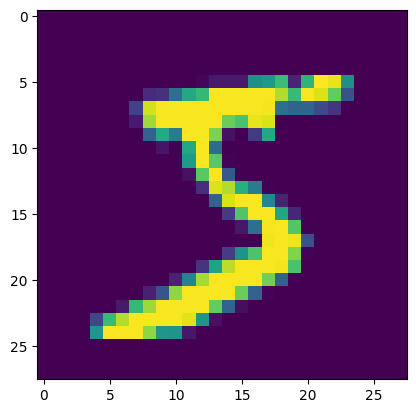

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [16]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.fully = nn.Sequential(
        nn.Linear(28*28, 10)
    )
  def forward(self, x):
    x = x.view([-1,28*28])
    x = self.fully(x)
    x = F.log_softmax(x, dim = 1)
    return x

In [17]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle = True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=False,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [20]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=False,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [23]:
def train():
  learning_rate = 1e-3
  num_epochs = 3

  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

  for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      output = net(data)
      
      loss = F.nll_loss(output,target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
         print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
  return net

In [25]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.3123719692230225
Epoch = 0.000000. Batch = 100. Loss = 0.8269096612930298
Epoch = 0.000000. Batch = 200. Loss = 0.5625117421150208
Epoch = 0.000000. Batch = 300. Loss = 0.527459442615509
Epoch = 0.000000. Batch = 400. Loss = 0.540480375289917
Epoch = 0.000000. Batch = 500. Loss = 0.4105648696422577
Epoch = 0.000000. Batch = 600. Loss = 0.5029066801071167
Epoch = 0.000000. Batch = 700. Loss = 0.37642720341682434
Epoch = 0.000000. Batch = 800. Loss = 0.27543583512306213
Epoch = 0.000000. Batch = 900. Loss = 0.26830050349235535
Epoch = 1.000000. Batch = 0. Loss = 0.4054115116596222
Epoch = 1.000000. Batch = 100. Loss = 0.371099054813385
Epoch = 1.000000. Batch = 200. Loss = 0.3160971701145172
Epoch = 1.000000. Batch = 300. Loss = 0.24385906755924225
Epoch = 1.000000. Batch = 400. Loss = 0.3318515121936798
Epoch = 1.000000. Batch = 500. Loss = 0.272270530462265
Epoch = 1.000000. Batch = 600. Loss = 0.29784655570983887
Epoch = 1.000000. Batch = 700. Los

In [26]:
net.eval()
test_lose = 0
correct = 0
total = 0

for data, target in test_loader:
  total += len(target)
  output = net(data)
  pred = output.max(1, keepdim=True)[1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/1000.)

Correct out of 10000 9207
Percentage accuracy 920.7


In [28]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
  total += len(target)
  output = net(data)
  pred = output.max(1, keepdim=True)[1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9207
Percentage accuracy 92.07


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/DM_Lab4/gapminder.csv')

<ipython-input-4-4976fa591727>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


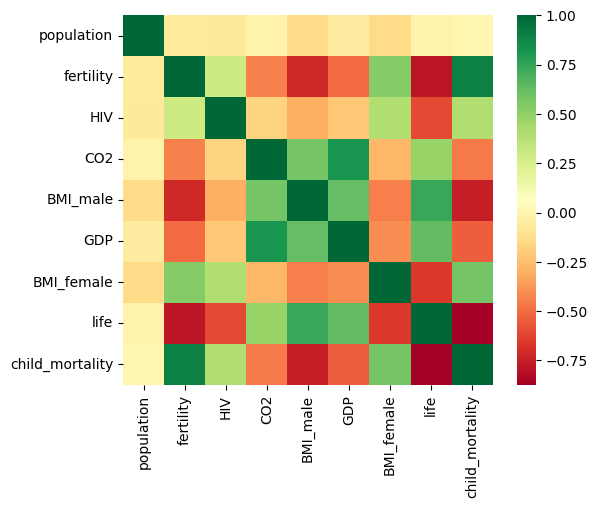

In [4]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151917


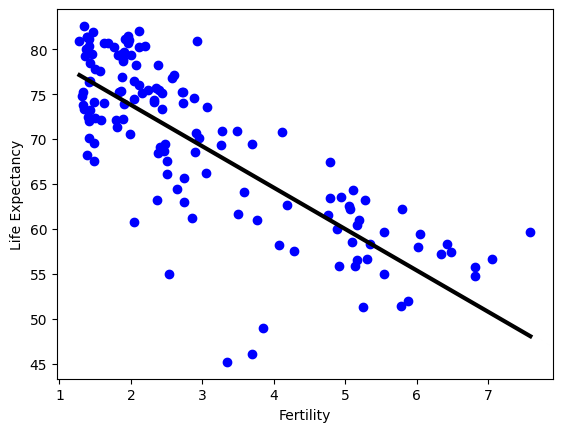

In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(x_train,y_train)
y_predict = reg.predict(prediction_space)

print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black',linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [9]:
path = '/content/drive/MyDrive/DM_Lab4/gapminder.csv'
features = pd.read_csv(path)
df = pd.read_csv(path)
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(x_train,y_train)

print(reg_all.score(features, y_life))

0.8914651485793176


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

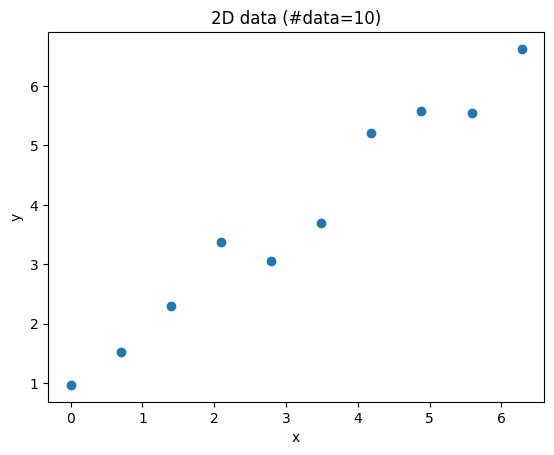

In [14]:
N = 10
m = .9
c = 1
x = np.linspace(0,2*np.pi, N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data=%d)' % N)
plt.show()

In [23]:
import torch

In [26]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
      self.x= x
      self.y= y

    def __len__(self):
      return len(self.x)
    
    def __getitem__(self, idx):
      sample = {
          'feature' : torch.tensor([1,self.x[idx]]),
          'label' : torch.tensor([self.y[idx]])
      }
      return sample

In [27]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  sample = dataset[i]
  print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.9671], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.5245], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.2910], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.3789], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.0537], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.6911], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([5.2019], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.5784], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.5485], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.6245], dtype=torch.float64)


In [28]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle = shuffle, num_workers=num_workers)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [29]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
  print('\nbatch# = %s' % i_batch)
  print('samples: ')
  pp.pprint(samples)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



batch# = 0
samples: 
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 0.0000],
        [1.0000, 1.3963],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[3.6911],
        [0.9671],
        [2.2910],
        [5.5784]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 6.2832],
        [1.0000, 4.1888],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[1.5245],
        [6.6245],
        [5.2019],
        [3.0537]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 5.5851]], dtype=torch.float64),
 'label': tensor([[3.3789],
        [5.5485]], dtype=torch.float64)}


In [31]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        out = self.linear(x)
        return out

In [32]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [34]:
cost = nn.MSELoss()

In [48]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T,dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


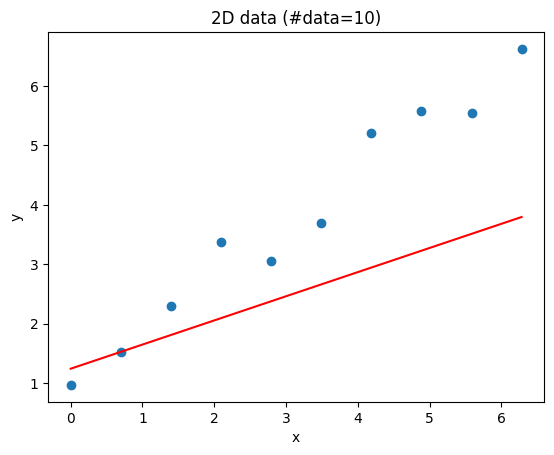

In [50]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data=%d)' % N)
plt.show()

In [1]:
def user_cf(M, metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.namean(M, axis=1)
  sim_users = sim_matrix(M, 'user', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan(M[i,j]):
        pred[i.j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_user[i])
  return pred

In [2]:
def item_cf(M,metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.namean(M, axis=0)
  sim_users = sim_matrix(M, 'user', metric)
  for i in range(n_items):
    if np.isnan(M[i,j]):
      pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
  return pred

In [3]:
def item_cf(M, metric='cosine'):
  pred = np.copy(M)
  n_users, n_items = M.shape
  avg_ratings = np.namean(M, axis = 0)
  sim_items = sim_matrix(M, 'item',metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan(M[i,j]):
        pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
    return pred